# Data Exploration of Framingham Heart Study Teaching Dataset 


This teaching dataset was developed using the longitudinal [Framingham heart study](https://biolincc.nhlbi.nih.gov/teaching/) as the data source. The teaching dataset includes three clinical examination and 20 year follow-up data based on a subset of the original Framingham cohort participants. This dataset was created for teaching and training purposes, and certain measures were used to created anonymous versions. Detailed documentation on variables can be found [HERE](https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation_2021a.pdf?link_time=2022-04-18_09:29:24.200176)

In this tutorial, we will demonstrate how to pull the object file of Framingham teaching dataset from [BioData Catalyst data commons](https://gen3.biodatacatalyst.nhlbi.nih.gov/) into a BRH workspace, and perform data exploration and visualization using Python packages. 




### Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

pd.set_option('mode.chained_assignment', None)

### Pull Framingham data file 

In [ ]:
!gen3 drs-pull object dg.4503/c97507dd-bb79-45ce-9186-3d14ad823f81

fram_df, fram_meta = pyreadstat.read_sav("frmgham2.sav", apply_value_formats=True)

### Data exploration

- Display column labels and their full names from metadata

In [189]:
col_names = fram_meta.column_names_to_labels

print ("{:<10} {:<10}".format('LABEL', 'NAME'))
 
# print each column item.
for key, value in col_names.items():
    print ("{:<10} {:<10}".format(key, value))

LABEL      NAME      
RANDID     Random ID 
SEX        SEX       
TOTCHOL    Serum Cholesterol mg/dL
AGE        Age (years) at examination
SYSBP      Systolic BP mmHg
DIABP      Diastolic BP mmHg
CURSMOKE   Current Cig Smoker Y/N
CIGPDAY    Cigarettes per day
BMI        Body Mass Index (kg/(M*M)
DIABETES   Diabetic Y/N
BPMEDS     Anti-hypertensive meds Y/N
HEARTRTE   Ventricular Rate (beats/min)
GLUCOSE    Casual Glucose mg/dL
EDUC       0-11 years, HS or GED, Some Coll, Coll Grad+
PREVCHD    Prevalent CHD (MI,AP,CI)
PREVAP     Prevalent Angina
PREVMI     Prevalent MI (Hosp,Silent)
PREVSTRK   Prevalent Stroke (Infarct,Hem)
PREVHYP    Prevalent Hypertension
TIME       Days since Index Exam
PERIOD     Examination cycle
HDLC       HDL Cholesterol mg/dL
LDLC       LDL Cholesterol mg/dL
DEATH      Death indicator
ANGINA     Incident Angina Pectoris
HOSPMI     Incident Hospitalized MI
MI_FCHD    Incident Hosp MI-Fatal CHD
ANYCHD     Incident Hosp MI, AP, CI, Fatal CHD
STROKE     Incident Str

- Explore the demographic characteristics of participants

In [190]:
# change the patiant ID column type from numeric to string
fram_df["RANDID"] = fram_df["RANDID"].astype(str)
fram_df["RANDID"] = fram_df["RANDID"].str[:-2]

In [191]:
# Map the gender value to male an female
sex_group_list = ['Male' if i==1.0 else 'Female' for i in fram_df['SEX']]
fram_df['SEX_GROUP'] = sex_group_list

In [192]:
# Create a subset of participants from first visit 
visit_1 =  fram_df[fram_df['PERIOD']==1]
visit_1.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,SEX_GROUP
0,2448,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.97,0.0,...,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0,Male
2,6238,2.0,250.0,46.0,121.0,81.0,0.0,0.0,28.73,0.0,...,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,Female
5,9428,1.0,245.0,48.0,127.5,80.0,1.0,20.0,25.34,0.0,...,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,Male
7,10552,2.0,225.0,61.0,150.0,95.0,1.0,30.0,28.58,0.0,...,1.0,2956.0,2956.0,2956.0,2956.0,2089.0,2089.0,2956.0,0.0,Female
9,11252,2.0,285.0,46.0,130.0,84.0,1.0,23.0,23.10,0.0,...,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4285.0,Female


In [193]:
# Functions to categorize age, BMI, and education value into groups
# Define age groups within participants
def age_group(agelist):
    min_age = min(agelist)
    grouplabel1 = str(min_age) + "-40 yr"
    grouplabel2 = "41-50 yr"
    grouplabel3 = "51-60 yr"
    grouplabel4 = "61-70 yr"
    grouplabel5 = "71-80 yr"
    grouplabel6 = "81-90 yr"
    grouplist = []
    for i in agelist:
        if i <= 40:
            grouplist.append(grouplabel1)
        elif i <=50:
            grouplist.append(grouplabel2)
        elif i <= 60:
            grouplist.append(grouplabel3)
        elif i <= 70:
            grouplist.append(grouplabel4)
        elif i <= 80:
            grouplist.append(grouplabel5)
        elif i <= 90:
            grouplist.append(grouplabel6)
        else:
            grouplist.append("NA")
            
    return grouplist

# Define BMI groups
def bmi_group(bmilist):
    grouplabel1 = "underweight"
    grouplabel2 = "healthy"
    grouplabel3 = "overweight"
    grouplabel4 = "obese"
    grouplist = []
    for i in bmilist:
        if i < 18.5 :
            grouplist.append(grouplabel1)
        elif i < 25:
            grouplist.append(grouplabel2)
        elif i < 30:
            grouplist.append(grouplabel3)
        else:
            grouplist.append(grouplabel4)
    return grouplist

# Define education groups
def edu_group(edu_list):
    grouplabel1 = "0-11 years"
    grouplabel2 = "High School Diploma, GED"
    grouplabel3 = "Some College, Vocational School"
    grouplabel4 = "College (BS, BA) degree or more"
    grouplist = []
    for i in edu_list:
        if i == 1.0:
            grouplist.append(grouplabel1)
        elif i == 2.0:
            grouplist.append(grouplabel2)
        elif i == 3.0:
            grouplist.append(grouplabel3)
        elif i == 4.0:
            grouplist.append(grouplabel4)
        else:
            grouplist.append("NA")
    return grouplist

In [194]:
visit_1["AGE_GROUP"] = age_group(list(visit_1["AGE"]))
visit_1["BMI_GROUP"] = bmi_group(list(visit_1["BMI"]))
visit_1["EDUC_GROUP"] = edu_group(list(visit_1["EDUC"]))
visit_1[["AGE", "AGE_GROUP", "BMI", "BMI_GROUP", 'EDUC', 'EDUC_GROUP']].head(5)

,AGE,AGE_GROUP,BMI,BMI_GROUP,EDUC,EDUC_GROUP
0,39.0,32.0-40 yr,26.97,overweight,4.0,"College (BS, BA) degree or more"
2,46.0,41-50 yr,28.73,overweight,2.0,"High School Diploma, GED"
5,48.0,41-50 yr,25.34,overweight,1.0,0-11 years
7,61.0,61-70 yr,28.58,overweight,3.0,"Some College, Vocational School"
9,46.0,41-50 yr,23.10,healthy,3.0,"Some College, Vocational School"


In [195]:
# Count the number of participants based on group category
pt_sex_age = pd.crosstab(index=visit_1['AGE_GROUP'], columns=visit_1['SEX_GROUP'])
pt_sex_bmi = pd.crosstab(index=visit_1['BMI_GROUP'], columns=visit_1['SEX_GROUP'])
pt_sex_edu = pd.crosstab(index=visit_1['EDUC_GROUP'], columns=visit_1['SEX_GROUP'])
pd.concat([pt_sex_age, pt_sex_bmi, pt_sex_edu], keys=['age', 'bmi', 'education'])

SEX_GROUP                                  Female  Male
age       32.0-40 yr                          415   339
          41-50 yr                            908   731
          51-60 yr                            795   584
          61-70 yr                            372   290
bmi       healthy                            1233   703
          obese                               359   237
          overweight                          853   992
          underweight                          45    12
education 0-11 years                          979   843
          College (BS, BA) degree or more     206   296
          High School Diploma, GED            772   509
          NA                                   56    57
          Some College, Vocational School     477   239

In [196]:
# Plot the counts of these demographic characteristics among participants
# Reformat the dataframe before plotting
demo_df = pd.concat([pt_sex_age, pt_sex_bmi, pt_sex_edu], keys=['Age','BMI','Education'])
demo_df.reset_index(inplace=True)
demo_df = pd.melt(demo_df, id_vars=['level_0', 'level_1'], value_vars=['Female', 'Male'], ignore_index=False)
demo_df = demo_df.rename({'level_0':"Group type", 'level_1':'Group value', 'value':'Counts', 'SEX_GROUP':'Sex'}, axis="columns")

# Show bar plot of participant counts based on gender, age, BMI, and education group
demo_fig = px.bar(demo_df, x="Group value", y="Counts", color="Sex", facet_row="Group type",
                  width=900, height=700, title="Age Group, BMI, and Education Characteristics of Participants in the Framingham Heart Study")
demo_fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
demo_fig.update_xaxes(matches='x')
demo_fig.show()

**Demographic characteristics of FHS participants**:
- Most participants in the Framingham Heart study were recruited to the study from age group of **40-50 and 50-60**.
- At first visit, few participants were found at obese and underweight BMI groups. The majority participants were found in either **healthy or overweight** BMI group. We saw more females in the healthy BMI group than males(1,233 vs 703).
- Nearly three quarters of the participants were found with 0-11 years educations or GED. Fewer participants were found with college degree.

### Risk factor exploration

- Risk factor at different time points

In [197]:
# add bmi group, age group, and education group to the fram_df
fram_df["AGE_GROUP"] = age_group(list(fram_df["AGE"]))
fram_df["BMI_GROUP"] = bmi_group(list(fram_df["BMI"]))
fram_df["EDUC_GROUP"] = edu_group(list(fram_df["EDUC"]))
fram_df.head(5)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,SEX_GROUP,AGE_GROUP,BMI_GROUP,EDUC_GROUP
0,2448,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.97,0.0,...,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0,Male,32.0-40 yr,overweight,"College (BS, BA) degree or more"
1,2448,1.0,209.0,52.0,121.0,66.0,0.0,0.0,NaN,0.0,...,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0,Male,51-60 yr,obese,"College (BS, BA) degree or more"
2,6238,2.0,250.0,46.0,121.0,81.0,0.0,0.0,28.73,0.0,...,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,Female,41-50 yr,overweight,"High School Diploma, GED"
3,6238,2.0,260.0,52.0,105.0,69.5,0.0,0.0,29.43,0.0,...,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,Female,51-60 yr,overweight,"High School Diploma, GED"
4,6238,2.0,237.0,58.0,108.0,66.0,0.0,0.0,28.50,0.0,...,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,Female,51-60 yr,overweight,"High School Diploma, GED"


In [198]:
# extract a subset of data for risk factor exploration

rf_df =  fram_df[['RANDID','SEX_GROUP', 'TIME', 'PERIOD', 'BMI', 'AGE', 
                  'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'HDLC', 
                  'LDLC', 'GLUCOSE']]

In [199]:
# Unpivot a dataframe from wide to long format
rf_df_melt =  pd.melt(rf_df, id_vars=['RANDID','SEX_GROUP','TIME', 'PERIOD'], 
                      value_vars=['BMI', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 
                                  'TOTCHOL', 'HDLC', 'LDLC', 'GLUCOSE'])
rf_df_melt.head()

,RANDID,SEX_GROUP,TIME,PERIOD,variable,value
0,2448,Male,0.0,1.0,BMI,26.97
1,2448,Male,4628.0,3.0,BMI,NaN
2,6238,Female,0.0,1.0,BMI,28.73
3,6238,Female,2156.0,2.0,BMI,29.43
4,6238,Female,4344.0,3.0,BMI,28.50


The next block shows the distribution of several risk factor variables, including BMI and AGE, at three visits.

In [200]:
# boxplot of risk factors at 3 visits
rf_fig1 =  px.violin(data_frame=rf_df_melt.loc[rf_df_melt['variable'].isin(['AGE', 'BMI']),],
                 x='PERIOD', y='value', width=800, height=500, color='variable', box=True)
rf_fig1.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
rf_fig1.update_xaxes(title="Visit")
rf_fig1.show()

- The median age of participants at three visits were 49, 55 and 60, respectively.
- At all three visit time point, the median value of BMIs were found around 25.5, which falls into `overweight category`.

The next block shows the distribution of several variables, including Systolic Blood Pressure (SYSBP), Diastolic Blood Pressure (DIABP), Serum Total Cholesterol (TOTCHOL), and Casual Serum Glucose (GLUCOSE), at three visits.

In [201]:
# boxplot of few risk factors at three visits
rf_fig2 =  px.box(data_frame=rf_df_melt.loc[rf_df_melt['variable'].isin(['SYSBP', 'DIABP',
                                                                         'TOTCHOL','GLUCOSE']),],
                 x='PERIOD', y='value', width=950, height=500, color='variable')
rf_fig2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
rf_fig2.update_xaxes(title="Visit")
rf_fig2.show()

- Risk factors and events heatmap visualization

The next block categorizes some of the risk factor values into binary groups using a threshold. For instance, Age over 60 is considered as a risk factor.

In [202]:
# Extract only the final visit of each participant and 
# and known risk factors asscoiated with cardiovascular disease incidence

visit_final =  fram_df.drop_duplicates("RANDID", keep='last')
visit_rf = visit_final[['RANDID','AGE', 'SEX_GROUP','CURSMOKE', 'TOTCHOL', 'BMI', 
                            'GLUCOSE', 'PREVCHD', 'PREVSTRK', 'PREVHYP', 'DIABETES', 'HEARTRTE']]

visit_rf['TOTCHOL_RF'] = [1 if i>200 else 0 for i in visit_rf['TOTCHOL']]
visit_rf['BMI_RF'] = [1 if i>25 else 0 for i in visit_rf['BMI']]
visit_rf['GLUCOSE_RF'] = [1 if i>200 else 0 for i in visit_rf['GLUCOSE']]
visit_rf['HEARTRTE_RF'] = [1 if i>100 else 0 for i in visit_rf['HEARTRTE']]
visit_rf['AGE_RF'] = [1 if i>=60 else 0 for i in visit_rf['AGE']]

visit_rf = visit_rf.drop(['AGE','TOTCHOL','BMI','GLUCOSE', 'HEARTRTE', 'SEX_GROUP'], axis=1)
visit_rf.head()

,RANDID,CURSMOKE,PREVCHD,PREVSTRK,PREVHYP,DIABETES,TOTCHOL_RF,BMI_RF,GLUCOSE_RF,HEARTRTE_RF,AGE_RF
1,2448,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
4,6238,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
6,9428,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
8,10552,1.0,0.0,0.0,1.0,0.0,1,1,0,0,1
11,11252,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0


The next block combines the risk factor dataframe with disease event and generates a correlation heatmap with these variables

In [203]:
# combine the visit_rf with event data

visit_event = visit_final[['RANDID', 'ANGINA','HOSPMI','MI_FCHD','ANYCHD', 'STROKE', 'CVD', 'HYPERTEN','DEATH']]
visit_rf_event = visit_rf.merge(visit_event, left_on="RANDID", right_on="RANDID")

visit_rf_event.head(5)

,RANDID,CURSMOKE,PREVCHD,PREVSTRK,PREVHYP,DIABETES,TOTCHOL_RF,BMI_RF,GLUCOSE_RF,HEARTRTE_RF,AGE_RF,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,DEATH
0,2448,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,6238,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9428,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10552,1.0,0.0,0.0,1.0,0.0,1,1,0,0,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,11252,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

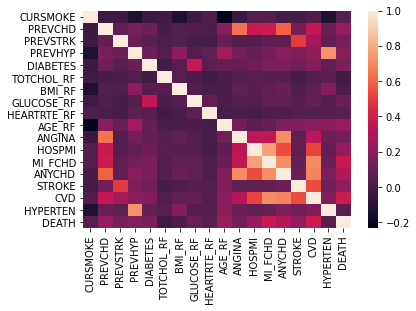

In [204]:
# generate correlation heatmap
visit_rf_event_noid = visit_rf_event.drop(['RANDID'],axis=1)

sns.heatmap(visit_rf_event_noid.corr())

In [205]:
# create a column that combines all the risk factors
visit_rf_event['RF_SUM'] = visit_rf_event['CURSMOKE'] + visit_rf_event['PREVCHD'] + visit_rf_event['PREVSTRK'] + visit_rf_event['PREVHYP']+  visit_rf_event['DIABETES'] + visit_rf_event['TOTCHOL_RF']+ visit_rf_event['BMI_RF'] + visit_rf_event['GLUCOSE_RF'] + visit_rf_event['HEARTRTE_RF'] + visit_rf_event['AGE_RF']

In [206]:
visit_rf_event.tail(5)

,RANDID,CURSMOKE,PREVCHD,PREVSTRK,PREVHYP,DIABETES,TOTCHOL_RF,BMI_RF,GLUCOSE_RF,HEARTRTE_RF,AGE_RF,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,DEATH,RF_SUM
4429,9990894,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
4430,9993179,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
4431,9995546,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0
4432,9998212,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4433,9999312,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


The next two blocks generate a counts table between risk factor sum variable and event sum variable

In [207]:
visit_rf_event['EVENT_SUM'] = visit_rf_event['ANYCHD'] + visit_rf_event['STROKE'] + visit_rf_event['CVD'] + visit_rf_event['HYPERTEN']


In [208]:
rf_count = pd.crosstab(index=visit_rf_event['RF_SUM'], columns=visit_rf_event['EVENT_SUM'])

rf_count

EVENT_SUM,0.0,1.0,2.0,3.0,4.0
RF_SUM,,,,,
0.0,60,15,1,0,0
1.0,250,152,19,14,2
2.0,413,472,77,56,4
3.0,203,741,123,233,28
4.0,31,552,105,297,52
5.0,0,114,73,169,44
6.0,0,13,20,41,32
7.0,0,2,1,11,10
8.0,0,0,0,2,2


The next block creates a histogram showing the composition of disease events in each risk factor group.

In [210]:
rf_count.reset_index(inplace=True)
rf_count_melt = pd.melt(rf_count, id_vars=['RF_SUM'], value_vars=[0,1,2,3,4], ignore_index=False)
rf_event_fig = px.bar(rf_count_melt, x='RF_SUM', y='value', 
                      color='EVENT_SUM', title="Risk Factors and Disease Events Histogram ",
                     color_discrete_sequence=px.colors.sequential.Sunsetdark)
rf_event_fig.show()

- Most of the participants had at least two risk fastors at third visit. 
- With the increase of risk factor, we observed a significant increase in multiple disease events. For instance, the majority of participants with three risk factors (the tallest bar) have at least 1 disease event.
- Among the participants with at least 3 risk factors, there is a signidicant increase in multiple disease event (2, 3, or 4). Meanwhile, fewer or no participants with at least 3 risk factors were found with zero disease event.